# Importing Libraries


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
import pickle 
import os
import random 


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [19]:
path = "/content"


In [20]:
train_data = open(path+'/train.p','rb')
train = pickle.load(train_data)
train_data.close()
val_data = open(path+'/valid.p','rb')
val = pickle.load(val_data)
val_data.close()
test_data = open(path+'/test.p','rb')
test = pickle.load(test_data)
test_data.close()

In [21]:
x_train,y_train = train['features'],train['labels']
x_val,y_val = val['features'],val['labels']
x_test,y_test = test['features'],test['labels']

In [22]:
x_train.shape

(34799, 32, 32, 3)

In [23]:
y_train.shape

(34799,)

# Data Visualization

38

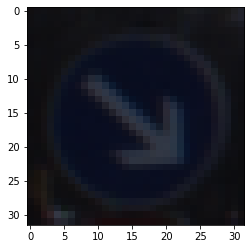

In [24]:
i = random.randint(1,len(x_train))
plt.imshow(x_train[i])
y_train[i]

34799


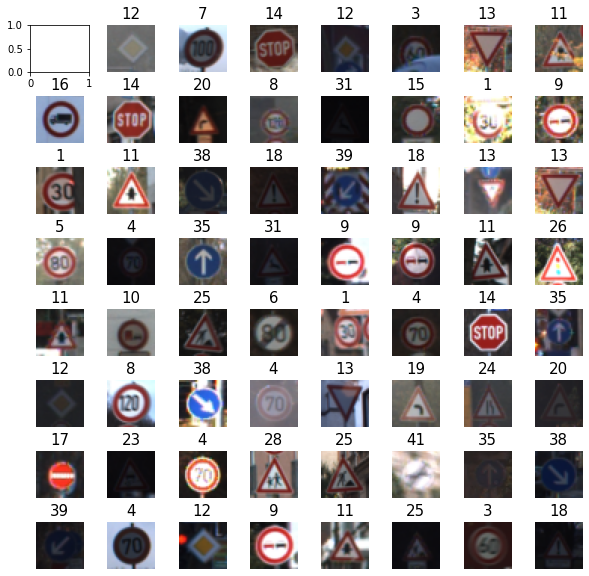

In [25]:
fig,axes = plt.subplots(8,8,figsize=(10,10))
axes = axes.ravel()
m = len(x_train)
print(m)

#Random Visualization of Traffic Signals
for i in np.arange(1,64):
    j = random.randint(1,m)
    axes[i].imshow(x_train[j])
    axes[i].set_title(y_train[j],fontsize=15)
    axes[i].axis('off')

    
plt.subplots_adjust(hspace=0.5)

# Grayscale and Normalization

In [26]:
#Shuffling of the dataset just to make sure that model doesn't learn the order of the images 
from sklearn.utils import shuffle
x_train,y_train =shuffle(x_train,y_train)

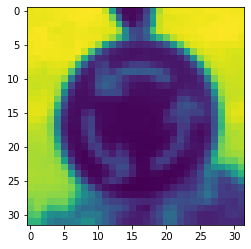

In [43]:
X_train=tf.image.rgb_to_grayscale(x_train)
X_val=tf.image.rgb_to_grayscale(x_val)
X_test=tf.image.rgb_to_grayscale(x_test)
plt.imshow(X_train[5][:,:,0])

In [ ]:
X_train= X_train/255
X_val= X_val/255
X_test= X_test/255


In [28]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train, 43)
Y_val = to_categorical(y_val,43)
Y_test = to_categorical(y_test, 43)

In [29]:
X_train.shape

TensorShape([34799, 32, 32, 1])

array([[[46, 41, 29],
        [44, 44, 29],
        [39, 41, 32],
        [49, 42, 36],
        [57, 45, 37],
        [54, 48, 38],
        [50, 49, 38],
        [51, 48, 38],
        [48, 45, 36],
        [47, 42, 34],
        [43, 38, 29],
        [40, 36, 27],
        [38, 37, 28],
        [30, 34, 27],
        [33, 34, 28],
        [36, 33, 28],
        [33, 33, 28],
        [36, 40, 37],
        [31, 32, 30],
        [29, 28, 25],
        [34, 29, 26],
        [39, 33, 30],
        [35, 31, 28],
        [28, 26, 23],
        [28, 25, 22],
        [27, 25, 24],
        [28, 26, 25],
        [30, 29, 26],
        [29, 28, 25],
        [24, 23, 22],
        [24, 22, 22],
        [27, 23, 24]]], dtype=uint8)

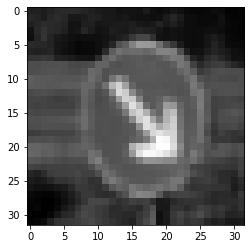

In [44]:
plt.figure()
plt.imshow(X_train[53][:,:,0],cmap='gray')


# Deep Convolutional Network

In [46]:
from tensorflow.keras import models,datasets,layers
CNN = models.Sequential()
CNN.add(layers.Conv2D(10,(5,5),activation='relu',input_shape=X_train[0].shape))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(10,(5,5),activation='relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())
CNN.add(layers.Dense(600,activation='relu'))
CNN.add(layers.Dense(150,activation='relu'))

CNN.add(layers.Dense(90,activation='relu'))
CNN.add(layers.Dense(43,activation='softmax'))
CNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 10)        260       
                                                                 
 average_pooling2d_5 (Averag  (None, 14, 14, 10)       0         
 ePooling2D)                                                     
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 10)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 10)        2510      
                                                                 
 average_pooling2d_6 (Averag  (None, 5, 5, 10)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 250)              

# Training the Model

In [47]:
CNN.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = CNN.fit(X_train,
       Y_train,
       batch_size=32,
       epochs=8,
       verbose=1,
       validation_data=(X_val,Y_val)
       )

Epoch 1/8
1088/1088 [==============================] - 30s 27ms/step - loss: 1.4526 - accuracy: 0.6329 - val_loss: 0.7510 - val_accuracy: 0.8265
Epoch 2/8
1088/1088 [==============================] - 28s 26ms/step - loss: 0.3590 - accuracy: 0.9025 - val_loss: 0.4333 - val_accuracy: 0.8943
Epoch 3/8
1088/1088 [==============================] - 28s 26ms/step - loss: 0.2200 - accuracy: 0.9391 - val_loss: 0.5839 - val_accuracy: 0.8805
Epoch 4/8
1088/1088 [==============================] - 29s 26ms/step - loss: 0.1617 - accuracy: 0.9553 - val_loss: 0.3560 - val_accuracy: 0.9136
Epoch 5/8
1088/1088 [==============================] - 29s 27ms/step - loss: 0.1400 - accuracy: 0.9604 - val_loss: 0.4028 - val_accuracy: 0.9166
Epoch 6/8
1088/1088 [==============================] - 29s 26ms/step - loss: 0.1284 - accuracy: 0.9640 - val_loss: 0.3838 - val_accuracy: 0.9211
Epoch 7/8
1088/1088 [==============================] - 28s 26ms/step - loss: 0.1190 - accuracy: 0.9676 - val_loss: 0.3739 - val_ac

# Prediction

In [48]:
acc=CNN.evaluate(X_test,Y_test)
print('Accuracy : {}'.format(acc[1]))

395/395 [==============================] - 4s 9ms/step - loss: 0.5774 - accuracy: 0.9020
Accuracy : 0.901979386806488


In [49]:
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

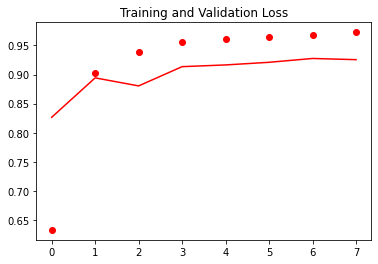

In [50]:
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'ro',label='Training Data')
plt.plot(epochs,val_accuracy,'r',label='Validation Data')
plt.title('Training and Validation Loss')

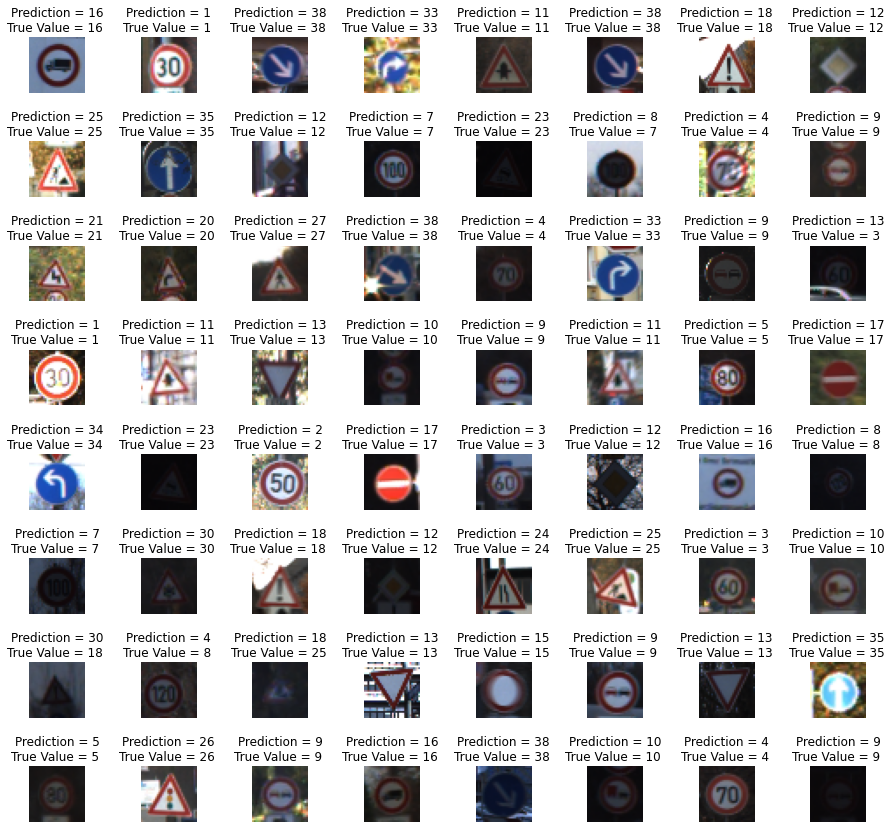

In [52]:
predict_x=CNN.predict(X_test)
predicted_classes=np.argmax(predict_x,axis=1)
y_true=y_test


tf.image.grayscale_to_rgb(X_test)
fig,axes=plt.subplots(8,8,figsize=(15,15))
axes=axes.ravel()

for i in np.arange(0,64):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\nTrue Value = {} '.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=1)